In [1]:
import pandas as pd
import re,glob
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
import seaborn as sns

In [2]:
def rename(path_name):
    return re.sub('.csv','',path_name[-10:])

def df_process(file):
    df = pd.read_csv(file,parse_dates=[['date', 'time']])
    df['station'] = rename(file)
    return df

def open_concat_csv(folder_path):
    all_filenames = [i for i in glob.glob(os.path.join(folder_path, '*.csv'))]
    df = pd.concat([df_process(f) for f in all_filenames])
    return df

path_water = "/home/song/Public/Song/Work/Thesis/data/waterlevel"


In [3]:
water_df = open_concat_csv(path_water)
print(water_df.shape)
print(water_df.columns)

(3571920, 3)
Index(['date_time', 'wl', 'station'], dtype='object')


In [4]:
water_df['wl'] = water_df['wl'].replace({-999:np.nan})
print(water_df.shape)
water_df.head()

(3571920, 3)


,date_time,wl,station
0,2007-01-01 00:00:00,NaN,PIN001
1,2007-01-01 00:10:00,NaN,PIN001
2,2007-01-01 00:20:00,NaN,PIN001
3,2007-01-01 00:30:00,NaN,PIN001
4,2007-01-01 00:40:00,NaN,PIN001


In [5]:
df_wl_st = pd.DataFrame()
for name,group in water_df.groupby('station'):
    if df_wl_st.empty:
        df_wl_st = group.set_index(["date_time"])[["wl"]].rename(columns={'wl':name})
    else:
        df_wl_st = df_wl_st.join(group.set_index(["date_time"])[["wl"]].rename(columns={'wl':name}))
        
print(water_df.shape)
df_wl_st.head()

(3571920, 3)


,CPY008,GLF001,NAN011,PIN001,PIN005
date_time,,,,,
2007-01-01 00:00:00,NaN,NaN,55.09,NaN,NaN
2007-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN
2007-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN
2007-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN
2007-01-01 00:40:00,NaN,NaN,NaN,NaN,NaN


In [6]:
print("Water lv. shape: ",df_wl_st.shape)
print("nan value: ", df_wl_st.isnull().sum())

Water lv. shape:  (714384, 5)
nan value:  CPY008    368635
GLF001    373003
NAN011    358803
PIN001    320395
PIN005    411939
dtype: int64


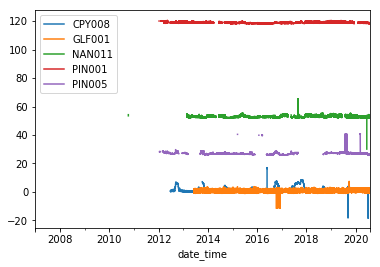

In [7]:
df_wl_st.plot()

# Station explore

In [26]:
!ls /home/song/Public/Song/Work/hii-telemetering-batch-data-master

combine_data   station_metadata-rain.csv	 water-level2007-2020
Explore.ipynb  station_metadata-water-level.csv  water_lv.csv
rain2007-2020  Trail.ipynb


In [27]:
filepath = ("../hii-telemetering-batch-data-master/")
rain_st = pd.read_csv(filepath+"station_metadata-rain.csv")
water_st = pd.read_csv(filepath+"station_metadata-water-level.csv")

In [52]:
water_st.groupby('basin').count()

,code,name,lat,long,tambon,amphoe,province,region,left_bank,right_bank,ground_level,rid_critical_level
basin,,,,,,,,,,,,
ชายฝั่งทะเลตะวันออก,13,13,13,13,13,13,13,13,12,12,4,0
ชายฝั่งทะเลประจวบคีรีขันธ์,3,3,3,3,3,3,3,3,3,3,3,0
ทะเลสาบสงขลา,8,8,8,8,8,8,8,8,7,7,7,0
ภาคใต้ฝั่งตะวันตก,15,15,15,15,15,15,15,15,15,15,14,0
ภาคใต้ฝั่งตะวันออก,15,15,15,15,15,15,15,15,12,12,12,0
แม่น้ำกก,6,6,6,6,6,6,6,6,6,6,6,0
แม่น้ำชี,34,34,34,34,34,34,34,34,17,17,16,1
แม่น้ำตาปี,12,12,12,12,12,12,12,12,9,9,9,0
แม่น้ำท่าจีน,19,19,19,19,19,19,19,19,10,10,10,1


In [45]:
# filter only related basin
water_st_focus = water_st.loc[(water_st['basin']=="แม่น้ำปิง")|(water_st['basin']=="แม่น้ำเจ้าพระยา")|(water_st['basin']=="แม่น้ำน่าน")]
print(water_st_focus.shape)
water_st_focus.head()
#น้ำเหนือที่ส่งผลให้ภาคกลางเกิดน้ำท่วมคือ แม่น้ำปิง กับ น่าน เพราะฉะนั้นโฟกัสแค่สองแม่น้ำนี้เป็นหลัก

(104, 13)


,code,name,lat,long,tambon,amphoe,province,basin,region,left_bank,right_bank,ground_level,rid_critical_level
12,PIN003,สะพานลานดอกไม้,16.628210,99.432550,ลานดอกไม้,เมืองกำแพงเพชร,กำแพงเพชร,แม่น้ำปิง,ภาคเหนือ,84.613,85.393,80.53,NaN
18,PIN001,บ้านตาก,17.041406,99.062195,ตากตก,บ้านตาก,ตาก,แม่น้ำปิง,ภาคเหนือ,121.600,121.600,118.19,NaN
19,PIN005,เก้าเลี้ยว,15.850530,100.052090,หัวดง,เก้าเลี้ยว,นครสวรรค์,แม่น้ำปิง,ภาคเหนือ,31.197,32.915,25.85,NaN
25,NAN005,แม่น้ำเข็ก (ว้งทอง),16.855024,100.666810,วังนกแอ่น,วังทอง,พิษณุโลก,แม่น้ำน่าน,ภาคเหนือ,136.628,136.624,134.96,NaN
28,NAN002,ภูเพียง,18.859726,100.817126,เมืองจัง,ภูเพียง,น่าน,แม่น้ำน่าน,ภาคเหนือ,207.863,206.317,196.91,NaN


In [49]:
rain_st.groupby('basin').count()

,code,name,lat,long,tambon,amphoe,province,region,station_type
basin,,,,,,,,,
ชายฝั่งทะเลตะวันออก,31,31,31,31,31,31,31,31,31
ชายฝั่งทะเลประจวบคีรีขันธ์,22,22,22,22,22,22,22,22,22
ทะเลสาบสงขลา,18,18,18,18,18,18,18,18,18
ภาคใต้ฝั่งตะวันตก,47,47,47,47,47,47,47,47,47
ภาคใต้ฝั่งตะวันออก,66,66,66,66,66,66,66,66,66
แม่น้ำกก,16,16,16,16,16,16,16,16,16
แม่น้ำชี,76,76,76,76,76,76,76,76,76
แม่น้ำตาปี,25,25,25,25,25,25,25,25,25
แม่น้ำท่าจีน,32,32,32,32,32,32,32,32,32


In [46]:
#rain_st = rain_st.loc((rain_st['basin']=="แม่น้ำปิง")|(rain_st['basin']=="แม่น้ำเจ้าพระยา")|(rain_st['basin']=="แม่น้ำน่าน"))
#rain_st.loc(rain_st['basin']=="แม่น้ำปิง")
rain_st.head()

,code,name,lat,long,tambon,amphoe,province,basin,region,station_type
0,BMKN,ทต.สันติสุข,18.528992,98.821082,สันติสุข,ดอยหล่อ,เชียงใหม่,แม่น้ำปิง,ภาคเหนือ,R
1,NTAN,อบต.นาตาล,15.901693,105.278726,นาตาล,นาตาล,อุบลราชธานี,แม่น้ำโขง,ภาคตะวันออกเฉียงเหนือ,R
2,LMSK,ทต.ตาลเดี่ยว,16.771422,101.253664,ตาลเดี่ยว,หล่มสัก,เพชรบูรณ์,แม่น้ำป่าสัก,ภาคเหนือ,R
3,DKTI,อบต.แม่อิง,19.224938,99.993350,แม่อิง,ภูกามยาว,พะเยา,แม่น้ำโขง,ภาคเหนือ,R
4,BGBO,ทต.เกาะช้าง,12.103424,102.351994,เกาะช้าง,เกาะช้าง,ตราด,ชายฝั่งทะเลตะวันออก,ภาคกลาง,R
